In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), 'ppo'))

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
import tensorflow as tf
import numpy as np
import copy
from environment import MnistEnvironment, Environment
from spatial_transformer import transformer
import util

import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from origin_model.mnist_solver import Network

In [ ]:
sess = tf.Session()

In [ ]:
model = Network(sess, phase='train') 

In [ ]:
mnist_cluttered = np.load('./data/mnist_sequence1_sample_5distortions5x5.npz')

X_train = mnist_cluttered['X_train']
y_train = mnist_cluttered['y_train']
X_valid = mnist_cluttered['X_valid']
y_valid = mnist_cluttered['y_valid']
X_test = mnist_cluttered['X_test']
y_test = mnist_cluttered['y_test']

In [3]:
import util

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
img = mnist.train.images[0].reshape([28,28,1])

In [8]:
thetas = [np.array((1,0,-10,0,1,-5)),
          np.array((2,-1,3,2,4,1)),
          np.array((3,1,1,1,1,1))]

In [11]:
aa = util.theta2affine_img(img, thetas[0], resize=(40,40))

In [12]:
aa.shape

(40, 40, 1)

In [ ]:
util.integrate_thetas(thetas)

In [ ]:
aa = [util.theta2mtx(theta) for theta in thetas]

In [ ]:
bb = util.theta2mtx(np.array((1,0,0,0,1,0)))

In [ ]:
for mtx in aa:
    bb = bb @ mtx

In [ ]:
bb

In [ ]:
aa[0] @ aa[1] @ aa[2]

### save and load the affMNIST

In [ ]:
# with open('affMNIST.pickle','rb') as f:
#     (train_inputs, train_targets), (test_inputs, test_targets) = pickle.load(f)

In [ ]:
# with open('affMNIST.pickle','wb') as f:
#     pickle.dump(dataset, f)

In [ ]:
x = tf.placeholder(tf.float32, [None, 1600])  # 40x40 image
keep_prob = tf.placeholder(tf.float32)

In [ ]:
x_tensor = tf.reshape(x, [-1, 40, 40, 1])

In [ ]:
loc1 = tf.layers.dense(x, 20, activation=tf.nn.tanh, name='actor1')
loc1_drop = tf.nn.dropout(loc1, keep_prob, name='actor_drop')
loc2 = tf.layers.dense(loc1_drop, 6, activation=tf.nn.tanh, name='actor2')

In [ ]:
loc2.shape

In [ ]:
out_size = (28, 28)
h_trans = transformer(x_tensor, loc2, out_size)

In [ ]:
h_trans.shape

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
model.checkpoint_load()

In [ ]:
img = X_train[123]
img = img.reshape([-1,1600])

In [ ]:
theta, original, transformed = sess.run([loc2, x_tensor, h_trans], feed_dict={
       x: img, keep_prob: 1.0})
print(theta[0])
print(original.shape)
print(transformed.shape)

In [ ]:
original = np.squeeze(original)
transformed = np.squeeze(transformed)

In [ ]:
plt.imshow(original)

In [ ]:
plt.imshow(transformed)

In [ ]:
loc_new = np.array([0.5881693,  -0.139267,   -0.42556356, -0.31432164,  0.640401,    0.42847702])
loc_new = np.reshape(loc_new, [-1, 6])

In [ ]:
original, transformed = sess.run([x_tensor, h_trans], feed_dict={
       x: img, loc2: loc_new, keep_prob: 1.0})

In [ ]:
original_ = np.squeeze(original)
transformed_ = np.squeeze(transformed)

In [ ]:
img_original = Image.fromarray(original_)
img_original = img_original.resize([28,28])
img_original = np.array(img_original)
plt.imshow(img_original)

In [ ]:
img_original = img_original.reshape([1,28,28,1])
prob_set = util.all_prob(model, img_original, mc=30)
unc_after = util.get_mutual_informations(prob_set)[0]
print(unc_after)

In [ ]:
img_transform = Image.fromarray(transformed_)
img_transform = img_transform.resize([28,28])
img_transform = np.array(img_transform)
plt.imshow(img_transform)

In [ ]:
img_transform.squeeze()[0:5,10:20]

In [ ]:
img_transform = img_transform.reshape([1,28,28,1])
prob_set = util.all_prob(model, img_transform, mc=30)
unc_after = util.get_mutual_informations(prob_set)[0]
print(unc_after)

In [ ]:
img = X_train[99]
img = img.reshape([-1,1600])

theta, original, transformed = sess.run([loc2, x_tensor, h_trans], feed_dict={
       x: img, keep_prob: 1.0})
print(theta[0])

In [ ]:
original = np.squeeze(original)
transformed = np.squeeze(transformed)
plt.imshow(original)

In [ ]:
loc_new = np.array([0.5861727,  -0.12842205,  0.52033045, -0.22849102,  0.69732974,  0.2140378])
loc_new = np.reshape(loc_new, [-1, 6])

original, transformed = sess.run([x_tensor, h_trans], feed_dict={
       x: img, loc2: loc_new, keep_prob: 1.0})

original_ = np.squeeze(original)
transformed_ = np.squeeze(transformed)

In [ ]:
plt.imshow(transformed_)

In [ ]:
img_original = Image.fromarray(original_)
img_original = img_original.resize([28,28])
img_original = np.array(img_original)
plt.imshow(img_original)

In [ ]:
img_original = img_original.reshape([1,28,28,1])
prob_set = util.all_prob(model, img_original, mc=30)
unc_after = util.get_mutual_informations(prob_set)[0]
print(unc_after)

In [ ]:
prob_set = util.all_prob(model, transformed, mc=30)
unc_after = util.get_mutual_informations(prob_set)[0]
print(unc_after)

In [ ]:
prob_set.shape

In [ ]:
prob_set.squeeze().mean(axis=0)

In [13]:
from tensorflow.examples.tutorials.mnist import input_data

In [14]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [49]:
img = mnist.train.next_batch(100)[0][5].reshape([28,28])

In [50]:
np.sum(img)

54.301964

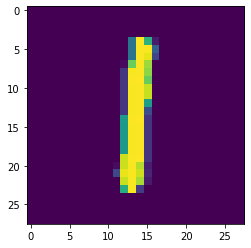

In [51]:
plt.imshow(img)

In [ ]:
thetas = [np.array((1,0,-10,0,1,-5)),
          np.array((2,-1,3,2,4,1)),
          np.array((3,1,1,1,1,1))]

In [ ]:
plt.imshow(img)

In [ ]:
ii = img.reshape([1,28,28,1])

In [ ]:
prob_set = util.all_prob(model, ii, mc=30)
unc_after = util.get_mutual_informations(prob_set)[0]
print(unc_after)

In [ ]:
prob_set.squeeze().mean(axis=0)

In [ ]:
import PIL

In [ ]:
from PIL import Image

In [ ]:
crop = img[5:,4:21]

In [ ]:
crop = np.array(Image.fromarray((crop*255.).astype(np.uint8)).resize((28,28),resample=Image.BILINEAR)) / 255.

In [ ]:
plt.imshow(crop)

In [ ]:
_crop = crop.reshape([1,28,28,1])
prob_set = util.all_prob(model, _crop, mc=30)
unc_after = util.get_mutual_informations(prob_set)[0]
print(unc_after)

In [ ]:
plt.imshow(img)

In [ ]:
theta = (-0.7,0.5,28,
         0,-0.7,28)

In [ ]:
pil_img = Image.fromarray((img*255.).astype(np.uint8))

In [ ]:
pil_img = pil_img.transform(pil_img.size, Image.AFFINE, theta, resample=Image.BICUBIC)

In [ ]:
iii = np.array(pil_img) / 255.
plt.imshow(iii)

In [ ]:
_iii = iii.reshape([1,28,28,1])
prob_set = util.all_prob(model, _iii, mc=30)
unc_after = util.get_mutual_informations(prob_set)[0]
print(unc_after)

In [ ]:
print(prob_set.squeeze().mean(axis=0))